In [48]:
import TechPatternBacktester as tester
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("seaborn")

In [49]:
ticker = "AMZN"
window = 5

raw = yf.download(ticker, "2014-01-01", "2019-12-12", interval = "1D")


## select only the columns I want 
raw = raw.loc[:, ["Open", "Close","Volume"]]
## raw = raw.loc[self.start:self.end].copy()
## raw.rename(columns = {"Close":"price"}, inplace = True)
raw["returns"] = np.log(raw.Close / raw.Close.shift(1))


[*********************100%***********************]  1 of 1 completed


In [50]:
raw

,Open,Close,Volume,returns
Date,,,,
2014-01-02,398.799988,397.970001,2137800,NaN
2014-01-03,398.290009,396.440002,2210200,-0.003852
2014-01-06,395.850006,393.630005,3170600,-0.007113
2014-01-07,395.040009,398.029999,1916000,0.011116
2014-01-08,398.470001,401.920013,2316500,0.009726
...,...,...,...,...
2019-12-05,1763.500000,1740.479980,2823800,-0.011545
2019-12-06,1751.199951,1751.599976,3117400,0.006369
2019-12-09,1750.660034,1749.510010,2442800,-0.001194


In [51]:
def calc_returns(buy_price, sell_price):
   return (sell_price - buy_price)/buy_price

raw["Moving_avg"] = raw.Close.rolling(5).mean()
raw.dropna(inplace=True)

In [52]:
raw.head(10)

,Open,Close,Volume,returns,Moving_avg
Date,,,,,
2014-01-08,398.470001,401.920013,2316500,0.009726,397.598004
2014-01-09,403.709991,401.010010,2103000,-0.002267,398.206006
2014-01-10,402.529999,397.660004,2679500,-0.008389,398.450006
2014-01-13,397.980011,390.980011,2844900,-0.016941,397.920007
2014-01-14,392.130005,397.540009,2340100,0.016639,397.822009
2014-01-15,398.940002,395.869995,2678300,-0.004210,396.612006
2014-01-16,393.679993,395.799988,2601200,-0.000177,395.570001
2014-01-17,394.260010,399.609985,4505100,0.009580,395.959998
2014-01-21,403.000000,407.049988,3122100,0.018447,399.173993


In [53]:
raw["moving_returns"] = np.log(raw.Moving_avg/raw.Moving_avg.shift(1))

In [54]:
##iterativly aquire moving average to determine whether uptrend or downtrend
def get_moving_average_trend(raw):
    uptrend = 0
    downtrend = 0
    raw["trend"] = 0

    for day in range(len(raw)):
        ## index out of bounds check
        if day > 5:
            trend = get_upTrend(day, raw)
            raw["trend"].iloc[day] = trend
           
## determine if moving average is an uptrend as described in Tsung-Hsun Lu & Yung-Ming Shiu 2012
def get_upTrend(startday, data):
        prev_avg = raw.moving_returns.iloc[startday-5]
        for day in range(startday-4, startday, 1):
            curr = data.moving_returns.iloc[day]
            if curr > prev_avg:
                curr = prev_avg
            else:
                return 0 
        return 1



def getTrend(startday, data):
    d1 = data.moving_returns.iloc[startday -5]
    d2 = data.moving_returns.iloc[startday -4]
    d3 = data.moving_returns.iloc[startday -3]
    d4 = data.moving_returns.iloc[startday -2]
    d5 = data.moving_returns.iloc[startday -1]
    d6 = data.moving_returns.iloc[startday]

    #handle case of all negatives
    if np.sign(d1) == -1 and np.sign(d2) == -1 and np.sign(d3) ==-1 and np.sign(d4) == -1 and np.sign(d5) == -1 and np.sign(d6) == -1:
        return -1
    elif np.sign(d1) == 1 and np.sign(d2) == 1 and np.sign(d3) == 1 and np.sign(d4) == 1 and np.sign(d5) == 1 and np.sign(d6) == 1:
        return 1
    else:
        return 0



    



In [55]:
get_moving_average_trend(raw)

In [56]:
raw.head(10)

,Open,Close,Volume,returns,Moving_avg,moving_returns,trend
Date,,,,,,,
2014-01-08,398.470001,401.920013,2316500,0.009726,397.598004,NaN,0
2014-01-09,403.709991,401.010010,2103000,-0.002267,398.206006,0.001528,0
2014-01-10,402.529999,397.660004,2679500,-0.008389,398.450006,0.000613,0
2014-01-13,397.980011,390.980011,2844900,-0.016941,397.920007,-0.001331,0
2014-01-14,392.130005,397.540009,2340100,0.016639,397.822009,-0.000246,0
2014-01-15,398.940002,395.869995,2678300,-0.004210,396.612006,-0.003046,0
2014-01-16,393.679993,395.799988,2601200,-0.000177,395.570001,-0.002631,0
2014-01-17,394.260010,399.609985,4505100,0.009580,395.959998,0.000985,0
2014-01-21,403.000000,407.049988,3122100,0.018447,399.173993,0.008084,0


In [57]:
raw.dropna(inplace=True)

In [58]:


## strategy 1243 in uptrend market Tsung-Hsun Lu & Yung-Ming Shiu 2012

def strat_1243(data, holding_time):
    data["position"] = 0
    data["strategy_returns"] = 0


    hTime = 0
    positon_start = 0
    day = 0
    buyPrice = 0
    while day < len(data):
        if data.trend.iloc[day] == 1:
            if is_strat_1243_candles(data,day, len(data)):
                positon_start = day+3
                buyPrice = data.Open.iloc[day+3]
                raw.position.iloc[day+3] = 1
                day+= 3
                hTime = holding_time
        if hTime != 0:
            raw.position.iloc[day] = 1
            hTime -= 1
        else:
            data.position.iloc[day] = 0
            ## closing position
            if buyPrice != 0:
                sell_price = data.Close.iloc[day]
                data["strategy_returns"].iloc[day] = calc_returns(buyPrice,sell_price)
                buyPrice = 0
        day+=1

    data["cstrategy"] = data.strategy_returns.cumsum()#.apply(np.exp)







## bar is tuple such as (-1,1) or (1,-1) - (1,-1) would entail closed lower than open  (1,1) 
# pos 
def is_strat_1243_candles(data,day, len):
    if(len-day >2):
        bar1 = data.iloc[day+1]
        bar2 = data.iloc[day+2]

        return bar1.Open > bar1.Close and bar2.Close > bar2.Open and bar2.Close < bar1.Close
    else:
        return


    




In [59]:

strategy = 1243
strat_1243(raw, window)

In [60]:
raw.cstrategy.iloc[-1]

0.4395670887272483

In [61]:
raw.head(50)

,Open,Close,Volume,returns,Moving_avg,moving_returns,trend,position,strategy_returns,cstrategy
Date,,,,,,,,,,
2014-01-09,403.709991,401.010010,2103000,-0.002267,398.206006,0.001528,0,0,0.0,0.0
2014-01-10,402.529999,397.660004,2679500,-0.008389,398.450006,0.000613,0,0,0.0,0.0
2014-01-13,397.980011,390.980011,2844900,-0.016941,397.920007,-0.001331,0,0,0.0,0.0
2014-01-14,392.130005,397.540009,2340100,0.016639,397.822009,-0.000246,0,0,0.0,0.0
2014-01-15,398.940002,395.869995,2678300,-0.004210,396.612006,-0.003046,0,0,0.0,0.0
2014-01-16,393.679993,395.799988,2601200,-0.000177,395.570001,-0.002631,0,0,0.0,0.0
2014-01-17,394.260010,399.609985,4505100,0.009580,395.959998,0.000985,0,0,0.0,0.0
2014-01-21,403.000000,407.049988,3122100,0.018447,399.173993,0.008084,0,0,0.0,0.0
2014-01-22,408.000000,404.540009,2060500,-0.006185,400.573993,0.003501,0,0,0.0,0.0


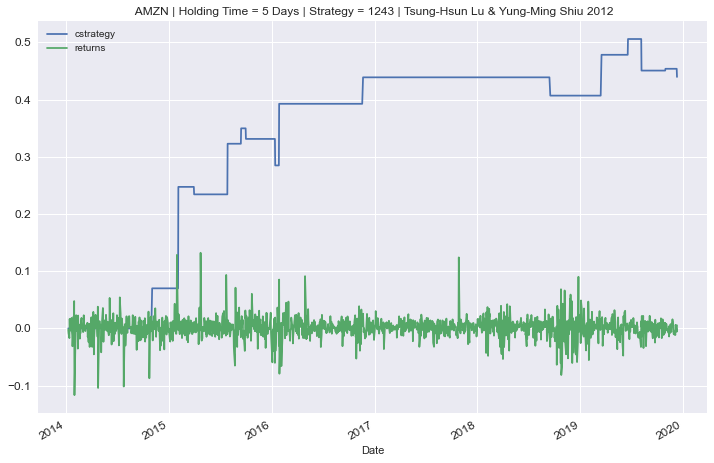

In [62]:
raw[["cstrategy","returns"]].plot(figsize = (12 , 8), title =f' {ticker} | Holding Time = {window} Days | Strategy = {strategy} | Tsung-Hsun Lu & Yung-Ming Shiu 2012', fontsize=12)
plt.show()

In [68]:
hits = np.sign(raw.returns*raw.strategy_returns).value_counts()

In [69]:
hits

 0.0    1477
 1.0      10
-1.0       5
dtype: int64

In [70]:
raw['hits'] = np.where((np.sign(raw.returns) == np.sign(raw.position) and raw.position == 1),1,0)

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [21]:
raw.hits.value_counts()

0    788
1    704
Name: hits, dtype: int64

In [22]:
len(raw)

1492